In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

In [1]:
rng_seed = 22

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#below line allows matplotlib plots to appear in cell output
%matplotlib inline

## **Question 1**: Parameter Estimation and Visualization

Write a function `analyze_normal_dataset(data, bins=30, show_plot=False)` that analyzes a dataset assumed to be drawn from a normal distribution.

Your function should:
1. Compute the sample mean and sample variance from the input data
2. Create a histogram of the data samples
3. Overlay the theoretical normal distribution PDF using the computed mean and variance
4. Display the computed statistics on the plot

**Requirements:**
- Compute sample mean using `np.mean(data)`
- Compute sample variance using `np.var(data, ddof=1)` (use Bessel's correction with ddof=1)
- Create histogram using `ax.hist()` with:
  - `bins=bins` parameter
  - `density=True` to normalize the histogram
  - `alpha=0.7` for transparency
  - `color='lightblue'`
  - `edgecolor='black'`
  - `label='Data Histogram'`
- For the PDF overlay:
  - Create x-values spanning the data range: `x = np.linspace(data.min() - 2*sample_std, data.max() + 2*sample_std, 1000)`
  - Calculate PDF using `scipy.stats.norm.pdf(x, loc=sample_mean, scale=sample_std)`
  - Plot as a red line with `linewidth=2` and `label='Fitted Normal PDF'`
- Add vertical lines for mean and mean±std:
  - Mean line: `ax.axvline(sample_mean, color='green', linestyle='-', linewidth=2, label=f'Mean = {sample_mean:.3f}')`
  - Mean±std lines: `ax.axvline(sample_mean ± sample_std, color='orange', linestyle='--', linewidth=1.5)`
- Set labels and formatting:
  - X-axis: "Value"  
  - Y-axis: "Density"
  - Title: f"Normal Distribution Analysis\\nMean = {sample_mean:.3f}, Std = {sample_std:.3f}, Variance = {sample_var:.3f}"
  - Add legend with `ax.legend()`
  - Add grid with `alpha=0.3`
- Return both the figure object and a tuple of the computed statistics: `(sample_mean, sample_var, sample_std)`

**Parameters:**
- `data`: numpy array, the dataset to analyze (assumed normally distributed)
- `bins`: int, default 30, number of bins for the histogram
- `show_plot`: bool, default False. If True, call `plt.show()`

**Returns:**
- `fig`: matplotlib figure object
- `stats`: tuple (sample_mean, sample_variance, sample_std)

In [3]:
def analyze_normal_dataset(data, bins=30, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Analyze a dataset assumed to be drawn from a normal distribution.
    
    Parameters:
    -----------
    data : numpy.ndarray
        The dataset to analyze (assumed normally distributed)
    bins : int, default 30
        Number of bins for the histogram
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the plot
    stats : tuple
        (sample_mean, sample_variance, sample_std)
    """
    # Compute sample statistics
    sample_mean = np.mean(data)
    sample_var = np.var(data, ddof=1)  # Bessel's correction
    sample_std = np.sqrt(sample_var)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create histogram
    ax.hist(data, bins=bins, density=True, alpha=0.7, 
            color='lightblue', edgecolor='black', label='Data Histogram')
    
    # Create PDF overlay using computed statistics
    x = np.linspace(data.min() - 2*sample_std, data.max() + 2*sample_std, 1000)
    pdf = sp.stats.norm.pdf(x, loc=sample_mean, scale=sample_std)
    ax.plot(x, pdf, 'r-', linewidth=2, label='Fitted Normal PDF')
    
    # Add vertical lines for mean and mean±std
    ax.axvline(sample_mean, color='green', linestyle='-', linewidth=2, 
               label=f'Mean = {sample_mean:.3f}')
    ax.axvline(sample_mean - sample_std, color='orange', linestyle='--', linewidth=1.5)
    ax.axvline(sample_mean + sample_std, color='orange', linestyle='--', linewidth=1.5)
    
    # Set labels and formatting
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Normal Distribution Analysis\\nMean = {sample_mean:.3f}, Std = {sample_std:.3f}, Variance = {sample_var:.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    if show_plot:
        plt.show()
    
    return fig, (sample_mean, sample_var, sample_std)
    # END SOLUTION
    """ # BEGIN PROMPT
    # Compute sample statistics
    sample_mean = np.mean(...)
    sample_var = np.var(..., ddof=1)  # Use Bessel's correction
    sample_std = ...
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create histogram
    
    # Overlay fitted normal PDF
    
    # Add vertical lines for mean and mean±std
    
    # Labels and formatting
    
    if show_plot:
        plt.show()
    
    return fig, (sample_mean, sample_var, sample_std)
    """; # END PROMPT

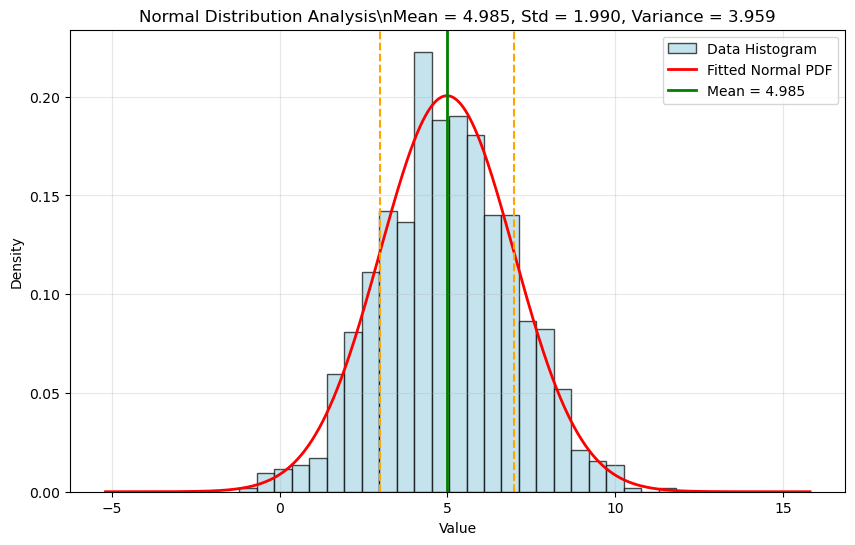

Computed statistics: Mean=4.985, Variance=3.959, Std=1.990
True parameters: Mean=5.0, Variance=4.0, Std=2.0


In [4]:
# Cell to view plot - test the function with sample data
rng = np.random.default_rng(rng_seed)
test_data = rng.normal(loc=5.0, scale=2.0, size=1000)  # Generate test data from known normal distribution
fig, stats = analyze_normal_dataset(test_data, bins=25, show_plot=True)
print(f"Computed statistics: Mean={stats[0]:.3f}, Variance={stats[1]:.3f}, Std={stats[2]:.3f}")
print(f"True parameters: Mean=5.0, Variance=4.0, Std=2.0")

In [ ]:
grader.check("q1")

## **Question 2**: Random Walk Ensemble Simulation

Write a function `plot_random_walks(p, N, M, show_plot=False)` that simulates and visualizes an ensemble of 1D random walks.

Your function should:
1. Simulate M independent random walks, each with N steps
2. For each walk, at each step, move up (+1) with probability p or down (-1) with probability (1-p)
3. Plot all M walks on the same figure as a function of step number
4. Show the ensemble behavior and individual trajectories

**Algorithm:**
- For each of the M walks:
  - Generate N random steps using Bernoulli distribution with probability p
  - Convert Bernoulli outcomes (0,1) to step directions (-1,+1)
  - Compute cumulative sum to get walk positions over time
- Plot all walks with step number on x-axis and position on y-axis

**Requirements:**
- Use the seeded random number generator: `rng = np.random.default_rng(rng_seed)`
- For each walk, generate steps using `rng.binomial(1, p, N)` to get 0s and 1s
- Convert to step directions: `steps = 2 * bernoulli_steps - 1` (maps 0→-1, 1→+1)
- Calculate walk positions using `np.cumsum()` with initial position 0
- Create the plot with:
  - X-axis: Step number (0 to N)
  - Y-axis: Position
  - Plot each walk as a line with `alpha=0.7` for transparency
  - Use different colors or let matplotlib cycle through colors automatically
- Add formatting:
  - X-axis label: "Step Number"
  - Y-axis label: "Position"
  - Title: f"Ensemble of {M} Random Walks (p = {p:.2f}, N = {N} steps)"
  - Grid with `alpha=0.3`
  - Set reasonable axis limits based on data range
- Return the matplotlib figure object

**Parameters:**
- `p`: float, probability of taking an upward step (+1)
- `N`: int, number of steps in each walk
- `M`: int, number of walks to simulate  
- `show_plot`: bool, default False. If True, call `plt.show()`

**Returns:**
- `fig`: matplotlib figure object

In [9]:
def plot_random_walks(p, N, M, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Simulate and plot an ensemble of 1D random walks.
    
    Parameters:
    -----------
    p : float
        Probability of taking an upward step (+1)
    N : int
        Number of steps in each walk
    M : int
        Number of walks to simulate
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the plot
    """
    # Use seeded random number generator for reproducible results
    rng = np.random.default_rng(rng_seed)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Simulate M random walks
    for walk_idx in range(M):
        # Generate N steps using Bernoulli distribution
        bernoulli_steps = rng.binomial(1, p, N)
        
        # Convert to step directions: 0 → -1, 1 → +1
        steps = 2 * bernoulli_steps - 1
        
        # Calculate walk positions (starting from position 0)
        positions = np.concatenate([[0], np.cumsum(steps)])
        
        # Plot this walk
        step_numbers = np.arange(N + 1)  # 0 to N inclusive
        ax.plot(step_numbers, positions, alpha=0.7, linewidth=1)
    
    # Set labels and formatting
    ax.set_xlabel('Step Number')
    ax.set_ylabel('Position')
    ax.set_title(f'Ensemble of {M} Random Walks (p = {p:.2f}, N = {N} steps)')
    ax.grid(True, alpha=0.3)
    
    # Set reasonable axis limits
    ax.set_xlim(0, N)
    
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Use seeded random number generator
    rng = np.random.default_rng(rng_seed)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Simulate M random walks
    for walk_idx in range(M):
        # Generate steps using Bernoulli distribution
        bernoulli_steps = rng.binomial(...)
        
        # Convert to step directions (-1, +1)
        steps = ...
        
        # Calculate cumulative positions
        positions = ...
        
        # Plot this walk
        step_numbers = ...
        ax.plot(...)
    
    # Labels and formatting
    
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

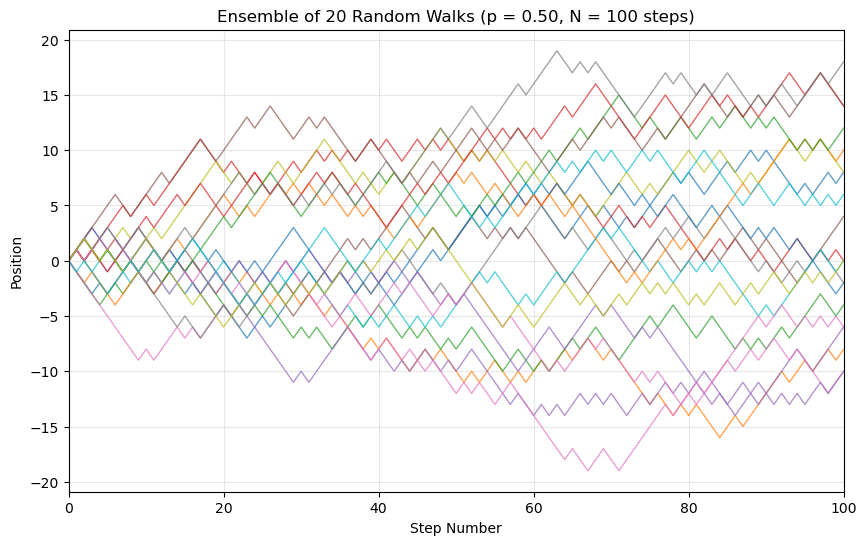

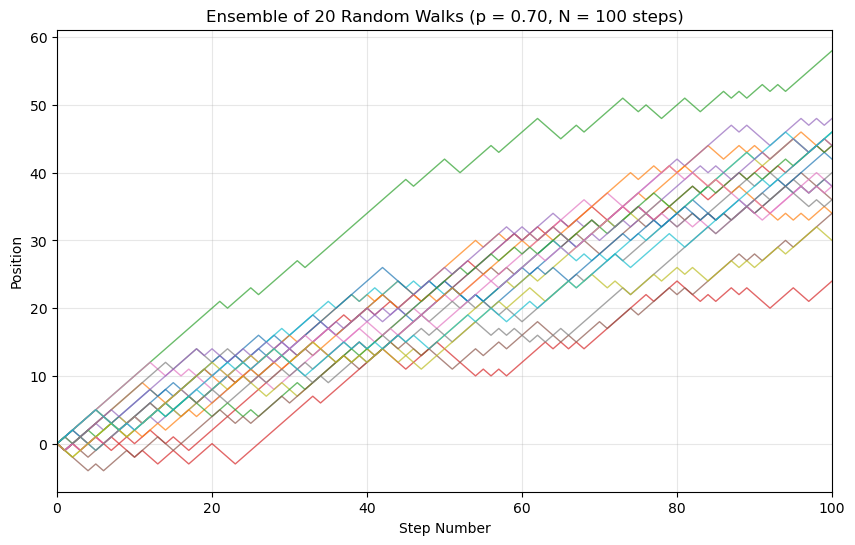

In [10]:
# Cell to view plot - test the function with sample parameters
fig1 = plot_random_walks(p=0.5, N=100, M=20, show_plot=True)  # Fair random walk
fig2 = plot_random_walks(p=0.7, N=100, M=20, show_plot=True)  # Biased upward walk

In [ ]:
grader.check("q2")

## **Question 3**: Monte Carlo Integration

### Part a: Area Under Curve Estimation

Write a function `monte_carlo_integration(func, a, b, n_points, show_plot=False)` that estimates the area under a curve using Monte Carlo methods.

Your function should:
1. Generate random points in the rectangular domain [a, b] × [0, max_y]
2. Determine which points fall under the curve defined by the function
3. Calculate the area using the ratio of points under the curve to total points
4. Create a visualization showing the function, sampling points, and integration region

**Algorithm:**
- Find the maximum value of the function in the interval [a, b] to define the sampling rectangle
- Generate random points uniformly in the rectangle [a, b] × [0, max_y]
- For each point (x, y), check if y ≤ func(x) (point is under the curve)
- Estimate area = (rectangle area) × (fraction of points under curve)
- Area = (b - a) × max_y × (points_under_curve / total_points)

**Requirements:**
- Use the seeded random number generator: `rng = np.random.default_rng(rng_seed)`
- To find max_y, evaluate the function on a dense grid: `x_eval = np.linspace(a, b, 1000)` and `max_y = np.max(func(x_eval))`
- Generate random points using `rng.uniform()`:
  - X coordinates: `rng.uniform(a, b, n_points)`
  - Y coordinates: `rng.uniform(0, max_y, n_points)`
- For each point, check if `y_random <= func(x_random)`
- Count points under the curve and calculate area estimate
- Create the plot with:
  - Plot the function curve using `x_plot = np.linspace(a, b, 1000)` and `ax.plot(x_plot, func(x_plot), 'b-', linewidth=2, label='Function')`
  - Plot points under curve as green dots: `ax.scatter(x_under, y_under, c='green', s=10, alpha=0.6, label='Under curve')`
  - Plot points above curve as red dots: `ax.scatter(x_above, y_above, c='red', s=10, alpha=0.6, label='Above curve')`
  - Fill area under curve: `ax.fill_between(x_plot, func(x_plot), alpha=0.3, color='lightblue', label='Integration region')`
- Add formatting:
  - X-axis label: "x"
  - Y-axis label: "f(x)" 
  - Title: f"Monte Carlo Integration: Area ≈ {area_estimate:.4f}"
  - Legend with `ax.legend()`
  - Grid with `alpha=0.3`
- Return both the area estimate and the figure object

**Parameters:**
- `func`: callable, function to integrate (assumed positive on [a, b])
- `a`: float, left boundary of integration
- `b`: float, right boundary of integration  
- `n_points`: int, number of random points to generate
- `show_plot`: bool, default False. If True, call `plt.show()`

**Returns:**
- `area_estimate`: float, estimated area under the curve
- `fig`: matplotlib figure object

In [15]:
def monte_carlo_integration(func, a, b, n_points, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Estimate the area under a curve using Monte Carlo integration.
    
    Parameters:
    -----------
    func : callable
        Function to integrate (assumed positive on [a, b])
    a : float
        Left boundary of integration
    b : float
        Right boundary of integration
    n_points : int
        Number of random points to generate
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    area_estimate : float
        Estimated area under the curve
    fig : matplotlib.figure.Figure
        The figure object containing the plot
    """
    # Use seeded random number generator for reproducible results
    rng = np.random.default_rng(rng_seed)
    
    # Find the maximum value of the function to define sampling rectangle
    x_eval = np.linspace(a, b, 1000)
    max_y = np.max(func(x_eval))
    
    # Generate random points in the rectangle [a, b] × [0, max_y]
    x_random = rng.uniform(a, b, n_points)
    y_random = rng.uniform(0, max_y, n_points)
    
    # Check which points are under the curve
    y_func_at_x = func(x_random)
    under_curve = y_random <= y_func_at_x
    
    # Calculate area estimate
    points_under_curve = np.sum(under_curve)
    rectangle_area = (b - a) * max_y
    area_estimate = rectangle_area * (points_under_curve / n_points)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the function curve
    x_plot = np.linspace(a, b, 1000)
    ax.plot(x_plot, func(x_plot), 'b-', linewidth=2, label='Function')
    
    # Fill area under curve
    ax.fill_between(x_plot, func(x_plot), alpha=0.3, color='lightblue', label='Integration region')
    
    # Separate points into under and above curve
    x_under = x_random[under_curve]
    y_under = y_random[under_curve]
    x_above = x_random[~under_curve]
    y_above = y_random[~under_curve]
    
    # Plot points under curve as green, above curve as red
    if len(x_under) > 0:
        ax.scatter(x_under, y_under, c='green', s=10, alpha=0.6, label='Under curve')
    if len(x_above) > 0:
        ax.scatter(x_above, y_above, c='red', s=10, alpha=0.6, label='Above curve')
    
    # Set labels and formatting
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Monte Carlo Integration: Area ≈ {area_estimate:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Set axis limits
    ax.set_xlim(a, b)
    ax.set_ylim(0, max_y * 1.05)
    
    if show_plot:
        plt.show()
    
    return area_estimate, fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Use seeded random number generator
    rng = np.random.default_rng(rng_seed)
    
    # Find maximum y value for sampling rectangle
    x_eval = np.linspace(a, b, 1000)
    max_y = np.max(func(...))
    
    # Generate random points
    x_random = rng.uniform(...)
    y_random = rng.uniform(...)
    
    # Check which points are under the curve
    under_curve = ...
    
    # Calculate area estimate
    area_estimate = ...
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot function and points
    
    # Labels and formatting
    
    if show_plot:
        plt.show()
    
    return area_estimate, fig
    """; # END PROMPT

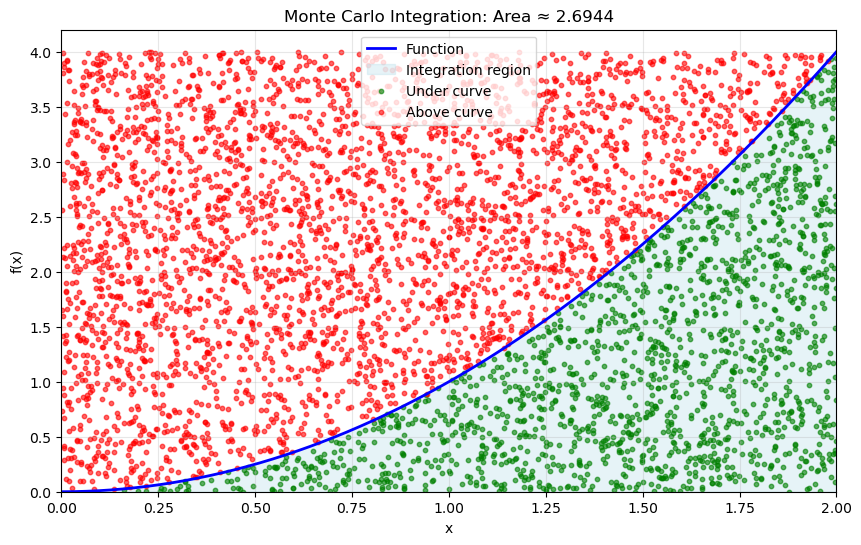

Estimated area under x² from 0 to 2: 2.6944
Analytical result: 2.6667


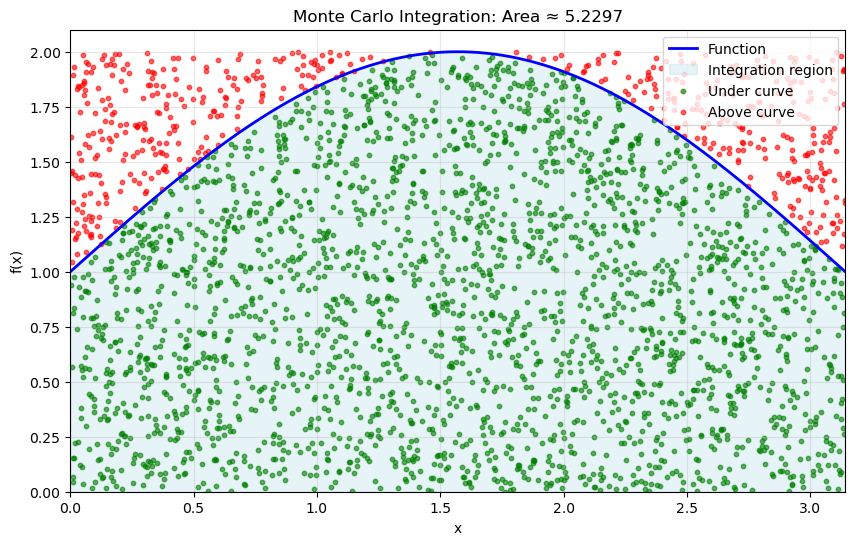

Estimated area under sin(x)+1 from 0 to π: 5.2297
Analytical result: 5.1416


In [16]:
# Cell to view plot - test the function with sample functions
# Test with quadratic function
def test_func1(x):
    return x**2

area1, fig1 = monte_carlo_integration(test_func1, 0, 2, 5000, show_plot=True)
print(f"Estimated area under x² from 0 to 2: {area1:.4f}")
print(f"Analytical result: {8/3:.4f}")

# Test with sine function
def test_func2(x):
    return np.sin(x) + 1  # Adding 1 to ensure positive

area2, fig2 = monte_carlo_integration(test_func2, 0, np.pi, 3000, show_plot=True)
print(f"Estimated area under sin(x)+1 from 0 to π: {area2:.4f}")
print(f"Analytical result: {np.pi + 2:.4f}")

In [ ]:
grader.check("q3")

## Required disclosure of use of AI technology

Please indicate whether you used AI to complete this homework. If you did, explain how you used it in the python cell below, as a comment.

In [21]:
# BEGIN SOLUTION NO PROMPT
# END SOLUTION
""" # BEGIN PROMPT
"""
# write ai disclosure here:

"""
"""; # END PROMPT

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Upload the .zip file to Gradescope!

In [ ]:
grader.export(pdf=False, force_save=True, run_tests=True)